<a href="https://colab.research.google.com/github/Faiq0007/Air_BnB_Analysis/blob/main/Project_Air_BnB_Listing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [3]:
import pandas as pd
listings = pd.read_csv('Listings.csv', encoding='latin1', low_memory=False)

In [4]:
#Printing the  First few rows
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
# Looking at info() to understand the data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [6]:
# Looking into host_since column
listings['host_since'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 279712 entries, 0 to 279711
Series name: host_since
Non-Null Count   Dtype 
--------------   ----- 
279547 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [7]:
# Changing the host_since column to date time format
listings['host_since'] = pd.to_datetime(listings['host_since'])

This code converts the host_since column in the listings DataFrame to a datetime format, allowing for more effective date manipulations and analyses, such as filtering by date or extracting year, month, or day components.

In [8]:
# Verifying the change
listings['host_since'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 279712 entries, 0 to 279711
Series name: host_since
Non-Null Count   Dtype         
--------------   -----         
279547 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


In [9]:
# Looking into city = Paris
paris_listings = listings[listings['city'] == 'Paris']

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

In [10]:
# Looking into first few rows of city = Paris
print(paris_listings.head())

   listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

  host_since                 host_location host_response_time  \
0 2011-12-03  Paris, Ile-de-France, France                NaN   
1 2013-11-29  Paris, Ile-de-France, France                NaN   
2 2014-07-31  Paris, Ile-de-France, France                NaN   
3 2013-12-17  Paris, Ile-de-France, France                NaN   
4 2014-12-14  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1               

Filtering the data down to rows where the city is Paris
keeping only the columns ‘host_since’, ‘neighbourhood’, ‘city’,
‘accommodates’, and ‘price’

In [11]:
# Keeping the required columns
paris_listings = listings[listings['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

This code filters the listings DataFrame to retain only the rows where the city is Paris and selects the specified columns: host_since, neighbourhood, city, accommodates, and price. The result is stored in a new DataFrame called paris_listings, focusing on relevant data for analysis.

In [12]:
# Checking for missing values
missing_values = paris_listings.isnull().sum()
print(missing_values)

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64


In [13]:
# Some stats about the column
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [14]:
# Calculating the min, max and avg for accommodates column
min_accommodates = paris_listings['accommodates'].min()
max_accommodates = paris_listings['accommodates'].max()
avg_accommodates = paris_listings['accommodates'].mean()

In [16]:
# Showing the values
print(f"Accommodates - Min: {min_accommodates}")
print(f"Accommodates - Max: {max_accommodates}")
print(f"Accommodates - Avg: {avg_accommodates}")

Accommodates - Min: 0
Accommodates - Max: 16
Accommodates - Avg: 3.0379965991652496


In [17]:
# Calculating the min, max and avg for price column

min_price = paris_listings['price'].min()
max_price = paris_listings['price'].max()
avg_price = paris_listings['price'].mean()

In [18]:
# Showing the values

print(f"Price - Min: {min_price}")
print(f"Price - Max: {max_price}")
print(f"Price - Avg: {avg_price}")

Price - Min: 0
Price - Max: 12000
Price - Avg: 113.09644458185191


Creating Paris Listings Neighbourhood Table

In [28]:
# To group the paris_listings DataFrame by the neighbourhood column and calculating the mean
paris_listings_neighbourhood = paris_listings.groupby('neighbourhood')['price'].mean().reset_index()

In [29]:
# Sorting by mean price (low to high)
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price')

In [30]:
# Displaying the result
print(paris_listings_neighbourhood)

          neighbourhood       price
10         Menilmontant   74.942257
2       Buttes-Chaumont   82.690182
3     Buttes-Montmartre   87.209479
17              Reuilly   89.058402
16           Popincourt   90.559459
6              Gobelins   98.110184
11         Observatoire  101.866801
0   Batignolles-Monceau  102.612702
5     Enclos-St-Laurent  102.967156
19            Vaugirard  106.831330
12                Opera  119.038644
14             Pantheon  122.662150
18               Temple  138.446823
7        Hotel-de-Ville  144.472110
1                Bourse  149.496801
9            Luxembourg  155.638639
13       Palais-Bourbon  156.856578
15                Passy  161.144635
8                Louvre  175.379972
4                Elysee  210.536765


 Creating Paris Listings Accommodations Table

In [31]:
# Getting the most expensive neighbourhood
most_expensive_neighbourhood = paris_listings_neighbourhood.iloc[-1]['neighbourhood']

In [32]:
# Filtering listings to the most expensive neighbourhood
most_expensive_neighbourhood_listings = paris_listings[paris_listings['neighbourhood'] == most_expensive_neighbourhood]

In [33]:
# To group the Accommodates DataFrame by the price column and calculating the mean
paris_listings_accommodations = most_expensive_neighbourhood_listings.groupby('accommodates')['price'].mean().reset_index()

In [34]:
# Sort by average price (low to high)
paris_listings_accommodations = paris_listings_accommodations.sort_values(by='price')

In [35]:
# Looking into the result
print(paris_listings_accommodations)

    accommodates       price
0              0    0.000000
1              1   79.522222
3              3  152.828767
2              2  155.103352
4              4  212.096070
5              5  328.817073
6              6  355.508571
8              8  405.518519
7              7  411.538462
9              9  440.272727
10            10  500.857143
12            12  529.625000
15            16  800.000000
11            11  805.000000
13            13  842.500000
14            14  971.000000


Creating Paris Listings Over Time Table:

In [36]:
# Extracting the year from host_since column
paris_listings['host_since_year'] = paris_listings['host_since'].dt.year

In [37]:
# To group paris_listings DataFrame by the host_since_year column, calculating two aggregated metrics
paris_listings_over_time = paris_listings.groupby('host_since_year').agg(
    avg_price=('price', 'mean'),
    new_hosts_count=('host_since', 'count')
).reset_index()

In [38]:
# Displaying the result
print(paris_listings_over_time)

    host_since_year   avg_price  new_hosts_count
0            2008.0   77.750000                4
1            2009.0  159.641509              106
2            2010.0  125.031250              416
3            2011.0  124.828230             1339
4            2012.0  111.578615             4592
5            2013.0  107.096414             8142
6            2014.0  100.253800            10922
7            2015.0  103.646250            12147
8            2016.0  114.159847             8871
9            2017.0  108.658888             4585
10           2018.0  138.209362             4294
11           2019.0  129.757113             5694
12           2020.0  141.456038             3412
13           2021.0   93.488722              133


Visualisations

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

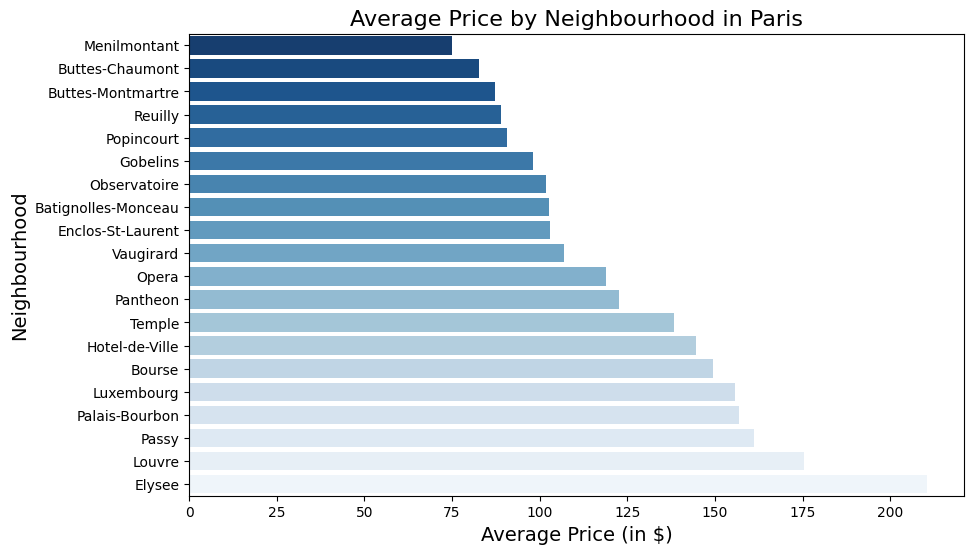

In [42]:
# Horizontal bar chart of the average price by neighborhood in Paris
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='neighbourhood', data=paris_listings_neighbourhood, palette='Blues_r')
plt.title('Average Price by Neighbourhood in Paris', fontsize=16)
plt.xlabel('Average Price (in $)', fontsize=14)
plt.ylabel('Neighbourhood', fontsize=14)
plt.show()

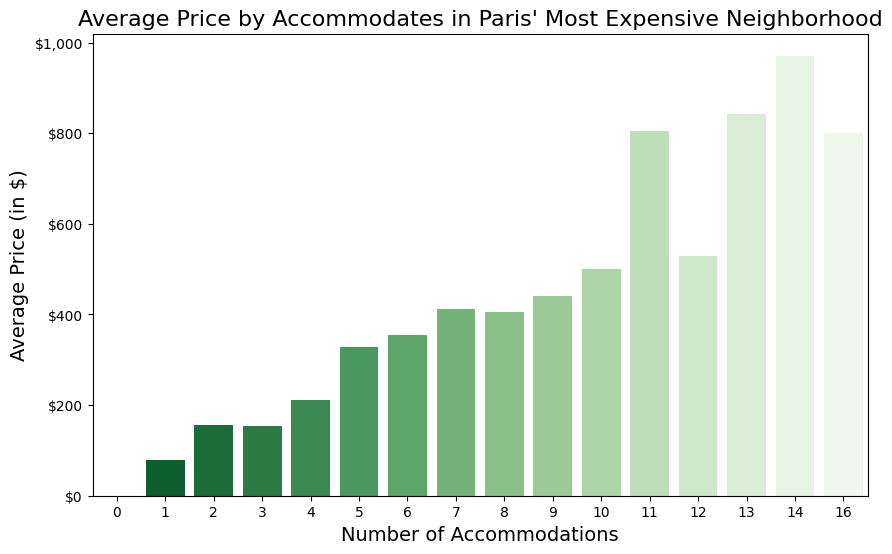

In [48]:
# Horizontal bar chart of the average price by accommodates in Paris’ most expensive neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(y='price', x='accommodates', data=paris_listings_accommodations, palette='Greens_r')
plt.title('Average Price by Accommodates in Paris\' Most Expensive Neighborhood', fontsize=16)
plt.ylabel('Average Price (in $)', fontsize=14)
plt.xlabel('Number of Accommodations', fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y):,}'))
plt.show()

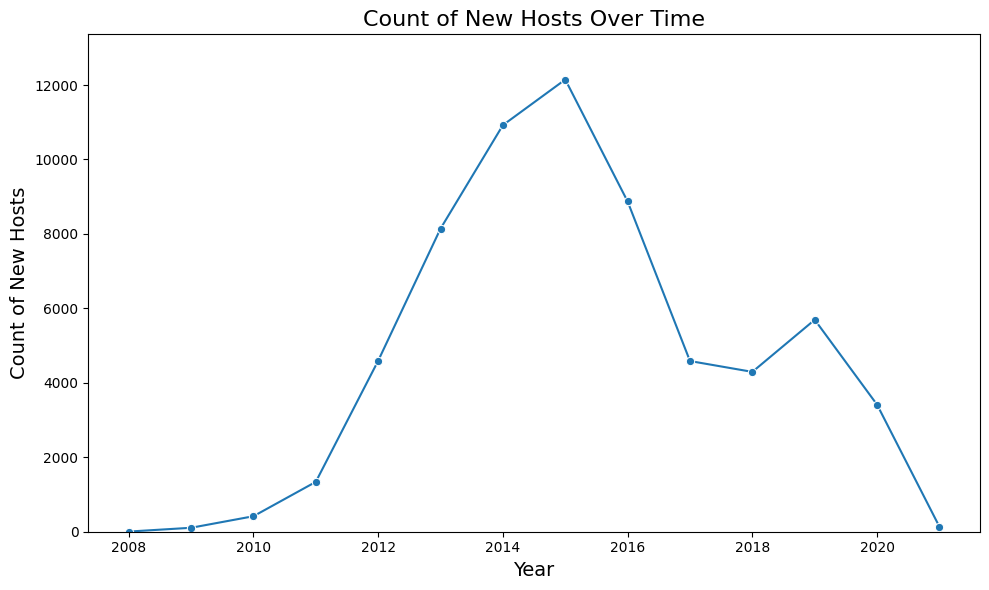

In [53]:
# Creating the line chart for count of new hosts over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=paris_listings_over_time, x='host_since_year', y='new_hosts_count', marker='o')
plt.title('Count of New Hosts Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of New Hosts', fontsize=14)
plt.ylim(0, paris_listings_over_time['new_hosts_count'].max() * 1.1)  # Set y-axis limit to 0
plt.tight_layout()
plt.show()

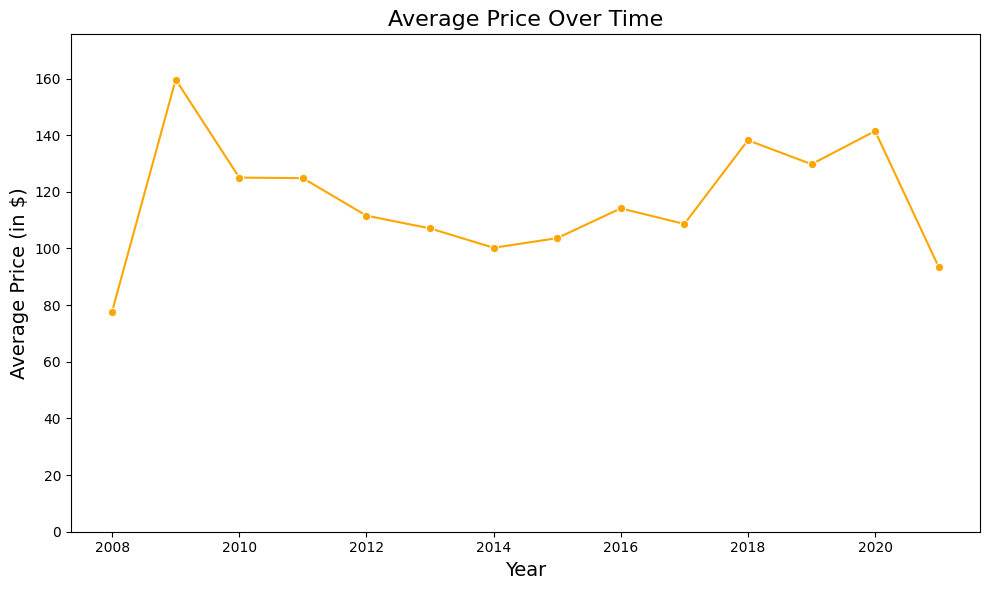

In [55]:
# Plot of Average Price Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=paris_listings_over_time, x='host_since_year', y='avg_price', marker='o', color='orange')
plt.title('Average Price Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (in $)', fontsize=14)
plt.ylim(0, paris_listings_over_time['avg_price'].max() * 1.1)  # Set y-axis limit to 0
plt.tight_layout()
plt.show()

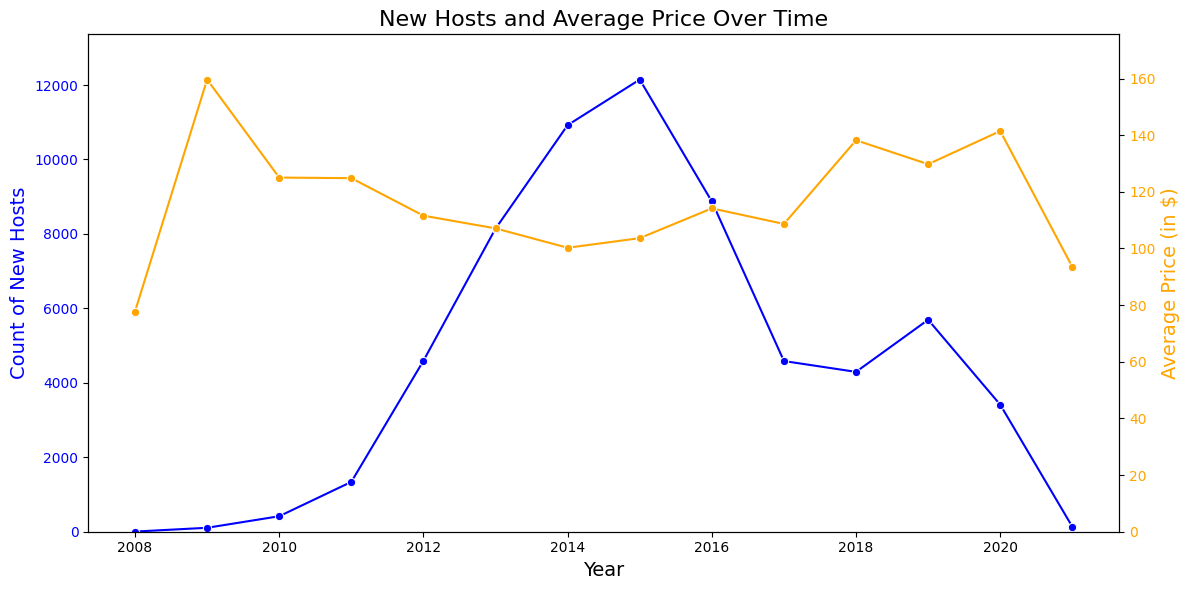

In [57]:
plt.figure(figsize=(12, 6))

# Creating the first line chart for count of new hosts
ax1 = plt.subplot(1, 1, 1)  # Create a single subplot
sns.lineplot(data=paris_listings_over_time, x='host_since_year', y='new_hosts_count', marker='o', color='blue', ax=ax1)
ax1.set_title('New Hosts and Average Price Over Time', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Count of New Hosts', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, paris_listings_over_time['new_hosts_count'].max() * 1.1)  # Set y-axis limit for new hosts

# Creating a second y-axis for the average price
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
sns.lineplot(data=paris_listings_over_time, x='host_since_year', y='avg_price', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Average Price (in $)', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, paris_listings_over_time['avg_price'].max() * 1.1)  # Set y-axis limit for average price

plt.tight_layout()
plt.show()